In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
path_to_market_data = 'D:\\Learning\\Time Series Analysis - Financial\\'

In [7]:
gold_df = pd.read_csv(path_to_market_data + 'LBMA-GOLD_V1.csv')
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

gold_df = gold_df[['Date', 'USD (PM)']]
gold_df.columns = ['Date', 'GLD']
gold_df['GLD'] = pd.to_numeric(gold_df['GLD'], errors='coerce')

print(np.min(gold_df['Date'] ),np.max(gold_df['Date'] ))
gold_df = gold_df.sort_values('Date', ascending=True) 
gold_df = gold_df.dropna(how='any')

gold_df.head()

1968-01-02 00:00:00 2020-12-08 00:00:00


,Date,GLD
13274,1968-01-04,37.70
13254,1968-01-05,39.20
13212,1968-01-07,40.80
13189,1968-01-08,38.90
13147,1968-01-10,39.45


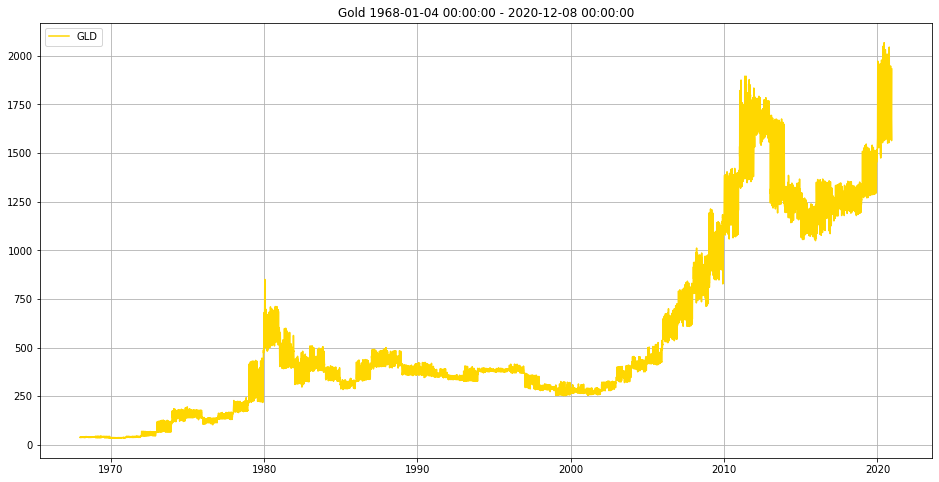

In [8]:
# Price chart
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gold_df['Date'], gold_df['GLD'], label='GLD', color='gold')
plt.title('Gold ' + str(np.min(gold_df['Date'])) + ' - ' + str(np.max(gold_df['Date'])))
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [9]:
def split_seq(seq, num_pieces):
    # https://stackoverflow.com/questions/54915803/automatically-split-data-in-list-and-order-list-elements-and-send-to-function
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
        
def pearson(s1, s2):
    """take two pd.Series objects and return a pearson corrleation"""
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

In [10]:
# we don't need to do this, just emphasizing 
gold_df = gold_df.sort_values('Date', ascending=True) 

lookback = 30
dates = gold_df['Date']
prices = list(gold_df['GLD'].values)
counter_ = -1
price_series = []
for day in dates:
    counter_ += 1
    # if counter_ % 1000 == 0: print(counter_)
    if counter_ >= lookback:
        price_series.append(prices[counter_-lookback:counter_])
                
timeseries_df = pd.DataFrame(price_series)  

In [11]:
timeseries_df.shape

(13157, 30)

In [12]:
timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,37.70,39.20,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,...,41.15,39.90,39.05,39.20,40.50,38.00,37.80,37.55,37.65,38.00
1,39.20,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,...,39.90,39.05,39.20,40.50,38.00,37.80,37.55,37.65,38.00,38.40
2,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,...,39.05,39.20,40.50,38.00,37.80,37.55,37.65,38.00,38.40,38.25
3,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,37.60,...,39.20,40.50,38.00,37.80,37.55,37.65,38.00,38.40,38.25,38.30
4,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,37.60,39.10,...,40.50,38.00,37.80,37.55,37.65,38.00,38.40,38.25,38.30,38.65


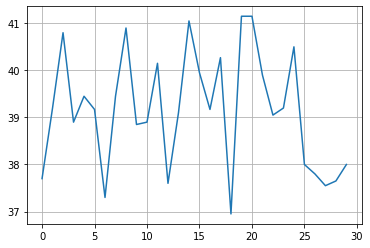

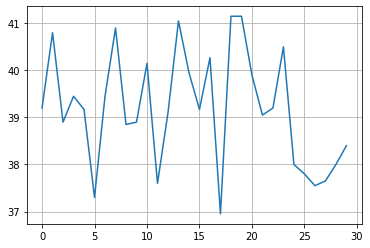

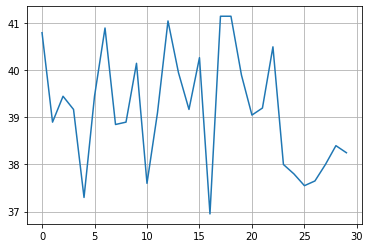

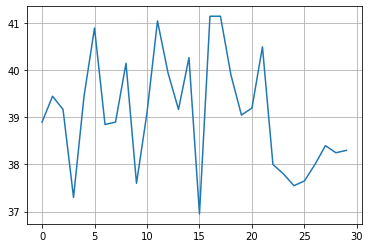

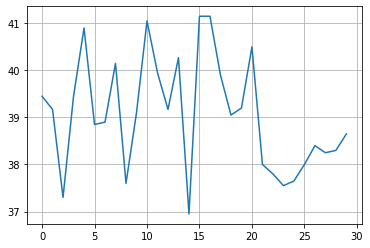

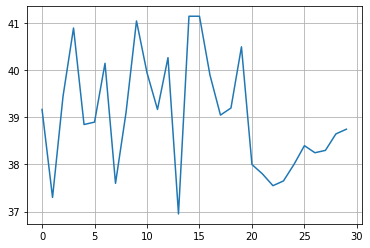

In [13]:
counter = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

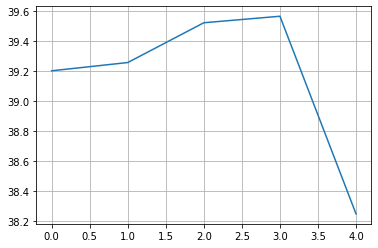

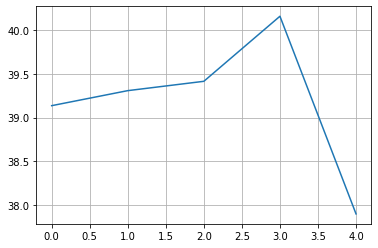

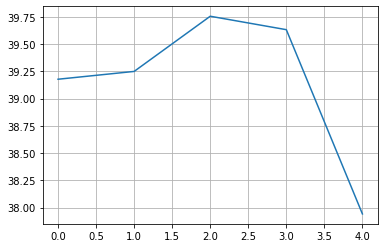

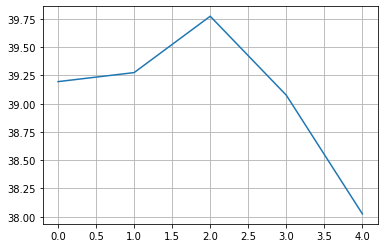

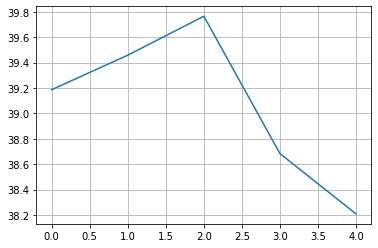

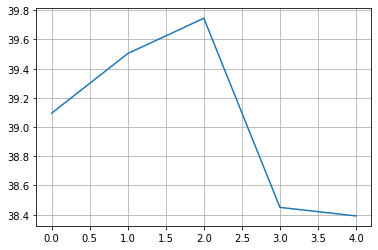

In [14]:
counter = 5
complexity = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot([np.mean(r) for r in split_seq(list(row.values), complexity)])
    plt.grid()
    plt.show()
    if counter < 0:
        break

In [16]:
r=row
[np.mean(t) for t in split_seq(list(r), complexity)]

[39.095, 39.50333333333333, 39.745000000000005, 38.45, 38.391666666666666]

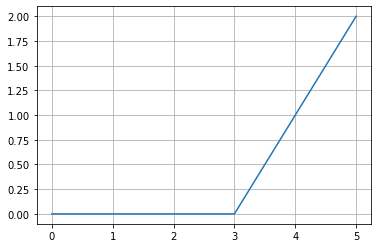

In [17]:
# let's single out the shape we want
correlate_against = [0,0,0,0,1,2] 
plt.plot(correlate_against)
plt.grid()

In [18]:
complexity = 6
outcome_list = []
for index, row in timeseries_df.iterrows():
    simplified_values = []
    for r in split_seq(list(row.values), complexity):
        simplified_values.append(np.mean(r))
    correz = pearson(simplified_values,correlate_against)
    if correz > 0.5:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

In [19]:
np.mean(outcome_list)

0.17063160294900054

In [20]:
timeseries_df['outcome'] = outcome_list
timeseries_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
0,37.70,39.20,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,...,39.90,39.05,39.20,40.50,38.00,37.80,37.55,37.65,38.00,0
1,39.20,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,...,39.05,39.20,40.50,38.00,37.80,37.55,37.65,38.00,38.40,0
2,40.80,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,...,39.20,40.50,38.00,37.80,37.55,37.65,38.00,38.40,38.25,0
3,38.90,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,37.60,...,40.50,38.00,37.80,37.55,37.65,38.00,38.40,38.25,38.30,0
4,39.45,39.17,37.30,39.45,40.90,38.85,38.90,40.15,37.60,39.10,...,38.00,37.80,37.55,37.65,38.00,38.40,38.25,38.30,38.65,0
5,39.17,37.30,39.45,40.90,38.85,38.90,40.15,37.60,39.10,41.05,...,37.80,37.55,37.65,38.00,38.40,38.25,38.30,38.65,38.75,0
6,37.30,39.45,40.90,38.85,38.90,40.15,37.60,39.10,41.05,39.95,...,37.55,37.65,38.00,38.40,38.25,38.30,38.65,38.75,39.10,0
7,39.45,40.90,38.85,38.90,40.15,37.60,39.10,41.05,39.95,39.17,...,37.65,38.00,38.40,38.25,38.30,38.65,38.75,39.10,37.00,0
8,40.90,38.85,38.90,40.15,37.60,39.10,41.05,39.95,39.17,40.27,...,38.00,38.40,38.25,38.30,38.65,38.75,39.10,37.00,41.20,0
9,38.85,38.90,40.15,37.60,39.10,41.05,39.95,39.17,40.27,36.95,...,38.40,38.25,38.30,38.65,38.75,39.10,37.00,41.20,41.00,0


In [21]:
timeseries_df_tmp = timeseries_df[timeseries_df['outcome']==1]
timeseries_df_tmp.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
13121,2031.15,1928.45,1807.50,1801.90,1804.60,1807.70,1807.35,1815.65,1842.55,1852.40,...,1910.95,1944.25,1944.75,1972.85,2008.75,1981.00,1927.15,1924.35,1943.95,1
13122,1928.45,1807.50,1801.90,1804.60,1807.70,1807.35,1815.65,1842.55,1852.40,1878.30,...,1944.25,1944.75,1972.85,2008.75,1981.00,1927.15,1924.35,1943.95,1911.15,1
13123,1807.50,1801.90,1804.60,1807.70,1807.35,1815.65,1842.55,1852.40,1878.30,1902.10,...,1944.75,1972.85,2008.75,1981.00,1927.15,1924.35,1943.95,1911.15,1932.95,1
13124,1801.90,1804.60,1807.70,1807.35,1815.65,1842.55,1852.40,1878.30,1902.10,1936.65,...,1972.85,2008.75,1981.00,1927.15,1924.35,1943.95,1911.15,1932.95,1923.85,1
13125,1804.60,1807.70,1807.35,1815.65,1842.55,1852.40,1878.30,1902.10,1936.65,1940.90,...,2008.75,1981.00,1927.15,1924.35,1943.95,1911.15,1932.95,1923.85,1957.35,1


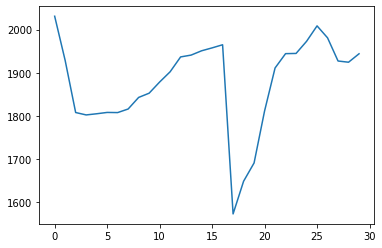

In [22]:
timeseries_df_tmp = timeseries_df_tmp.tail()
# pull one example and remove the outcome variable
example = timeseries_df_tmp.values[0][:-1]
plt.plot(example)

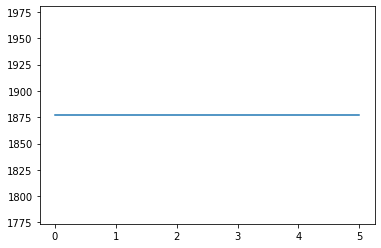

In [23]:
simplified_values = []
for r in split_seq(list(example), complexity):
    simplified_values.append(np.mean(example))
plt.plot(simplified_values)

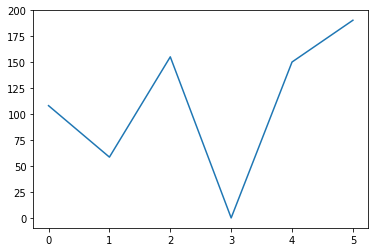

In [24]:
vals = [np.mean(r) for r in split_seq(list(example), complexity)]
np.min(vals)
vals2 = [val - np.min(vals) for val in vals]
plt.plot(vals2)